# Trantando os dados

### Predição Online

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

box_jenkins = pd.read_csv(
    '../Data/Online Prediction/Box-Jenkins_Gas-furnace.txt',
    header=None,
    names=['Input Gas Rate', 'CO2 (%)'])

# Visualize data
box_jenkins.head(2)

,Input Gas Rate,CO2 (%)
0,-0.109,53.8
1,0.000,53.6


Text(0, 0.5, 'CO2 (%)')

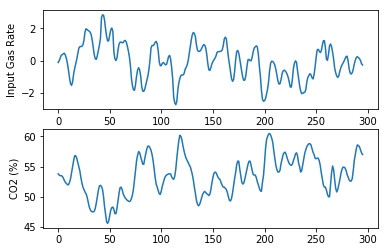

In [2]:
#Plotando Input Gas rate
plt.subplot(211)
plt.plot(box_jenkins['Input Gas Rate'])
plt.ylabel('Input Gas Rate')

#Plotando Concentração de CO2
plt.subplot(212)
plt.plot(box_jenkins['CO2 (%)'])
plt.ylabel('CO2 (%)')

# Regressão Utilizando RNA

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Import neural network for regression
from sklearn.neural_network import MLPRegressor

# Import function for cross-validation
from sklearn.model_selection import cross_val_score

# Define neural network architecture
# Two hidden layers with three neurons each
mlp = MLPRegressor(hidden_layer_sizes=(3,3))

# Train and estimate model performance
scores = cross_val_score(mlp,
                         box_jenkins[['Input Gas Rate']],
                         box_jenkins['CO2 (%)'], 
                         scoring='neg_mean_squared_error',
                         cv=10)

# Get score
print('MSE: ' + '{:.1f}'.format(-scores.mean()))

MSE: 2534.3


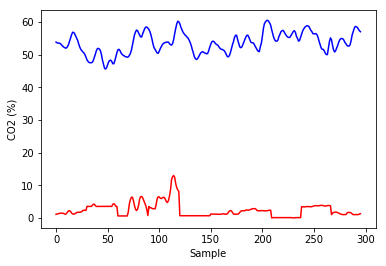

In [4]:
# Import function for cross-validation prediction
from sklearn.model_selection import cross_val_predict

# Import PyPlot for data visualization
import matplotlib.pyplot as plt

# Train and predict model outputs
y_pred = cross_val_predict(mlp,
                           box_jenkins[['Input Gas Rate']],
                           box_jenkins['CO2 (%)'],
                           cv=10)

# Plot CO2 series
plt.plot(box_jenkins['CO2 (%)'], color='blue')
plt.plot(y_pred, color='red')
plt.ylabel('CO2 (%)'), plt.xlabel('Sample');

## 0. Tratamento de Dados

O tratamento adequado dos dados de treinamento pode melhorar a performance da rede, mesmo que sua arquitetura se mantenha inalterada.

### 1. Escalonando os Dados

Dados serão escalados entre 0 e 1. A tendencia é que o MSE seja reduzido.

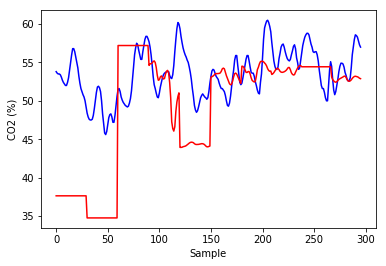

In [5]:
# Scale input and output
scaled_box_jenkins = box_jenkins.copy()
for i in range(2):
    scaled_box_jenkins.iloc[:,i] = ((box_jenkins.iloc[:,i] - box_jenkins.iloc[:,i].min())
                          / (box_jenkins.iloc[:,i].max() - box_jenkins.iloc[:,i].min()))

# Train and estimate model performance
y_pred = cross_val_predict(mlp,
                           scaled_box_jenkins[['Input Gas Rate']],
                           scaled_box_jenkins['CO2 (%)'],
                           cv=10)
# Rescale prediction
y_pred = (y_pred
          * (box_jenkins['CO2 (%)'].max() - box_jenkins['CO2 (%)'].min())
         + box_jenkins['CO2 (%)'].min())

# Plot CO2 series
plt.plot(box_jenkins['CO2 (%)'], color='blue')
plt.plot(y_pred, color='red')
plt.ylabel('CO2 (%)'), plt.xlabel('Sample');

## 2. Padronização dos Dados
In standardization, we remove the mean of the values and scale the standard deviation to 1

In [6]:
# Standardize input and output
standardized_box_jenkins = box_jenkins.copy()
for i in range(2):
    standardized_box_jenkins.iloc[:,i] = ((box_jenkins.iloc[:,i] - box_jenkins.iloc[:,i].mean())
                          / box_jenkins.iloc[:,i].std())

In [7]:
# Add delayed features
standardized_box_jenkins['Input Gas Rate (-1)'] = standardized_box_jenkins['Input Gas Rate'].shift(periods=1)
standardized_box_jenkins.loc[0,'Input Gas Rate (-1)'] = standardized_box_jenkins.loc[1,'Input Gas Rate (-1)']

standardized_box_jenkins['Input Gas Rate (-2)'] = standardized_box_jenkins['Input Gas Rate (-1)'].shift(periods=1)
standardized_box_jenkins.loc[0,'Input Gas Rate (-2)'] = standardized_box_jenkins.loc[1,'Input Gas Rate (-2)']

standardized_box_jenkins['Input Gas Rate (-3)'] = standardized_box_jenkins['Input Gas Rate (-2)'].shift(periods=1)
standardized_box_jenkins.loc[0,'Input Gas Rate (-3)'] = standardized_box_jenkins.loc[1,'Input Gas Rate (-3)']

standardized_box_jenkins['CO2 (%) (-1)'] = standardized_box_jenkins['CO2 (%)'].shift(periods=1)
standardized_box_jenkins.loc[0,'CO2 (%) (-1)'] = standardized_box_jenkins.loc[1,'CO2 (%) (-1)']

standardized_box_jenkins['CO2 (%) (-2)'] = standardized_box_jenkins['CO2 (%) (-1)'].shift(periods=1)
standardized_box_jenkins.loc[0,'CO2 (%) (-2)'] = standardized_box_jenkins.loc[1,'CO2 (%) (-2)']

standardized_box_jenkins['CO2 (%) (-3)'] = standardized_box_jenkins['CO2 (%) (-2)'].shift(periods=1)
standardized_box_jenkins.loc[0,'CO2 (%) (-3)'] = standardized_box_jenkins.loc[1,'CO2 (%) (-3)']

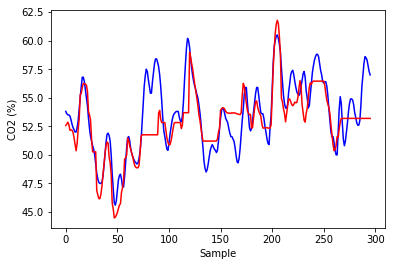

In [8]:
# Train and estimate model performance
y_pred = cross_val_predict(mlp,
                           standardized_box_jenkins[['Input Gas Rate', 
                                                     'Input Gas Rate (-1)', 
                                                     'Input Gas Rate (-2)',
                                                     'Input Gas Rate (-3)', 
                                                     'CO2 (%) (-1)', 
                                                     'CO2 (%) (-2)', 
                                                     'CO2 (%) (-3)']],
                           standardized_box_jenkins['CO2 (%)'],
                           cv=10)

# Rescale prediction
y_pred = (y_pred
          * box_jenkins['CO2 (%)'].std()
         + box_jenkins['CO2 (%)'].mean())

# Plot CO2 series
plt.plot(box_jenkins['CO2 (%)'], color='blue')
plt.plot(y_pred, color='red')
plt.ylabel('CO2 (%)'), plt.xlabel('Sample');

Let's try a different model
Instead of neural networks, let's check the results with a SVM (support vector machine)

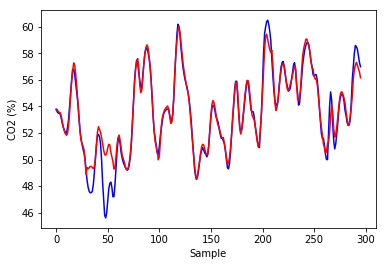

In [9]:
# Import model
from sklearn.svm import SVR

# Train and estimate model performance
y_pred = cross_val_predict(SVR(),
                           standardized_box_jenkins[['Input Gas Rate', 
                                                     'Input Gas Rate (-1)', 
                                                     'Input Gas Rate (-2)',
                                                     'Input Gas Rate (-3)', 
                                                     'CO2 (%) (-1)', 
                                                     'CO2 (%) (-2)', 
                                                     'CO2 (%) (-3)']],
                           standardized_box_jenkins['CO2 (%)'],
                           cv=10)

# Rescale prediction
y_pred = (y_pred
          * box_jenkins['CO2 (%)'].std()
         + box_jenkins['CO2 (%)'].mean())

# Plot CO2 series
plt.plot(box_jenkins['CO2 (%)'], color='blue')
plt.plot(y_pred, color='red')
plt.ylabel('CO2 (%)'), plt.xlabel('Sample');